      위험라벨링값  감염경로라벨링  접촉자수  확진자동선개수  ...   지역코드    감염유형  확진자수  초등학교수
0          0        3    17        2  ...  10230   환자 접촉    17     13
1          0        3     2        1  ...  10170   환자 접촉    27     29
2          0        3    43        1  ...  10230   환자 접촉    17     13
3          0        3     0        1  ...  10230   환자 접촉    17     13
4          0        3     6        4  ...  10170   환자 접촉    27     29
...      ...      ...   ...      ...  ...    ...     ...   ...    ...
2790       0        9    84        0  ...  70000     etc    14    113
2791       0        9    21        0  ...  70000     etc    14    113
2792       0        9    74        0  ...  70000     etc    14    113
2793       0        3     5        0  ...  70000   환자 접촉    14    113
2794       0        7     0        0  ...  70000  이태원 클럽    14    113

[2795 rows x 12 columns]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________


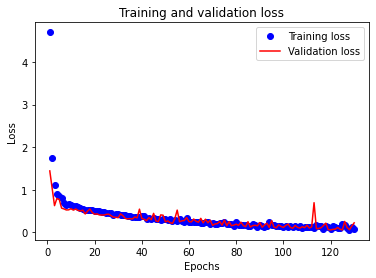

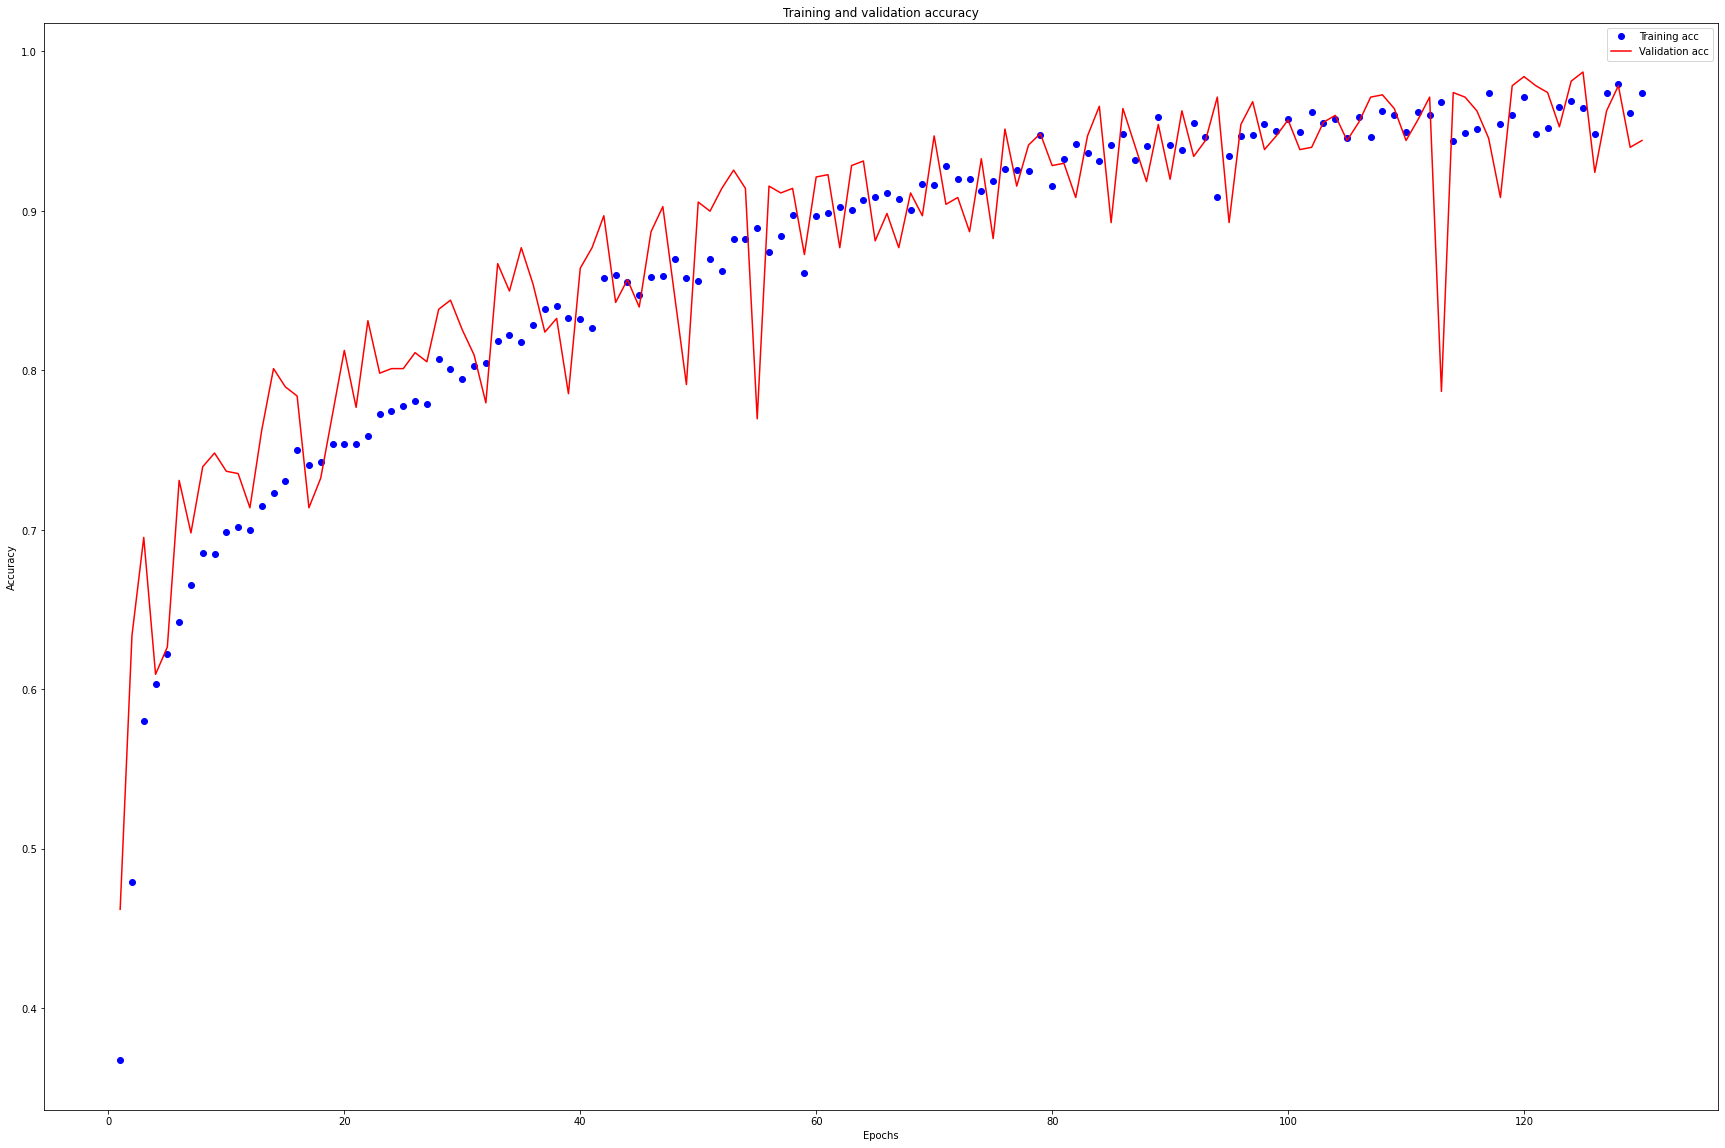

index:  234 actual y:  2 predicted y:  2
index:  456 actual y:  1 predicted y:  1
index:  456 actual y:  1 predicted y:  1
index:  377 actual y:  0 predicted y:  0
index:  589 actual y:  2 predicted y:  2
index:  276 actual y:  0 predicted y:  0
index:  344 actual y:  2 predicted y:  2
index:  550 actual y:  2 predicted y:  2
index:  40 actual y:  1 predicted y:  1
index:  456 actual y:  1 predicted y:  1
22/22 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9442
loss:  0.21970495581626892
accuracy 0.9442059993743896


In [ ]:
#코로나 바이러스 분석
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(777)  # for reproducibility

#하이퍼 파라미터 설정
learning_rate = 0.0005
batch_size = 3
training_epochs = 130
nb_classes = 3
drop_rate = 0.005

data1 = pd.read_csv('딥러닝사용파일.csv')
print(data1)

#데이터 슬라이싱 
x = data1.iloc[:,1:7]
y = data1[['위험라벨링값']]
#Train Data와 Test Data 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#형변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(input_dim=6, units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

#Validation
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미
plt.plot(epochs, val_loss, 'r', label='Validation loss') # ‘b’는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()

plt.show()

plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


In [ ]:
data1 = pd.read_excel('검증.xlsx')
print(data1)
x = data1.iloc[:,1:7]

x_data = x.to_numpy()
x_data.shape
print(x_data)

predict = tf.model.predict(x_data)

# 위험도0   위험도1   위험도2
zero= 0
one= 0
two= 0

for i in range(len(predict)):
    a = np.argmax(predict[i])
    
    if a == 0:
        zero += 1
    elif a == 1:
        one += 1
    elif a == 2:
        two+= 1
        
    print("위험도:",a, ", 확률:",predict[i][a]*100,"%")


   label  감염경로라벨링  접촉자수  확진자동선개수  대학교수  ...  유치원수        환자ID  광역자치단체 기초자치단체 감염경로
0    NaN        1    50       10     3  ...   127  2000000100     경기도    성남시  A교회

[1 rows x 11 columns]
[[   1   50   10    3 2095  127]]
위험도: 2 , 확률: 99.98307228088379 %
